# Modules imported for the analysis 

In [1]:
#Modules are imported for the analysis

#Pandas library is used for working with the datasets, it has function of manipulating, cleaning, analyzing exploring the data
#Numpy library is used for the mathematical operations 
#Matplotlib library is used for data visualisation and graphical plotting in the data.
#Seaborn library is used for making stastical graphics.
#Scipy is used for technical and scientific computation. Stats is a submodule of scipy library which provides stastical functions.
#Datetime library provides working with the date and time. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from datetime import datetime

# First dataset for the baseline 2015-2019 imported 

In [2]:
#Dataset imported for the baseline analysis 2015-2019 and assigned it into a variable called 'df1'

df1 = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/Project MSc Data Science/weekly-deaths-by-date-health-board-location-15-19.csv")

In [3]:
df1

,"Data for weekly deaths (occurrences), by Health Board and location, 2015-2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,back to contents,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,week of occurrence,health board,location,year,number of deaths,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,Ayrshire and Arran,Care Home,2015,23,NaN,NaN,NaN,NaN,NaN
4,01,Ayrshire and Arran,Home / Non-institution,2015,28,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11155,52,Western Isles,Care Home,2019,1,NaN,NaN,NaN,NaN,NaN
11156,52,Western Isles,Home / Non-institution,2019,2,NaN,NaN,NaN,NaN,NaN
11157,52,Western Isles,Hospital,2019,4,NaN,NaN,NaN,NaN,NaN
11158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Since the columns heading are named as "Unnamed" it is renamed by the (.rename function) to the relevant names for the columns.

df1 = df1.rename(columns = {
    df1.columns[0]: 'week of occurrence',
    'Unnamed: 1': 'health board',
    'Unnamed: 2': 'location',
    'Unnamed: 3': 'year',
    'Unnamed: 4': 'number of deaths',

})

In [5]:
#Dropped the columns which does not contains any values.

df1 = df1.drop(columns=["Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "back to contents", "Unnamed: 9"])

In [6]:
#Dropped the 'nan' values from the dataset

df1.dropna(inplace = True)

In [7]:
#Dropped the first row since it was duplicating the column names

df1 = df1.drop(index=1)

In [8]:
#Restarted the index with 0

start = 0
df1.index = range(start, start +len(df1))

In [9]:
#By using (.dtypes) checked the datatype of the df1

print(df1.dtypes)

week of occurrence    object
health board          object
location              object
year                  object
number of deaths      object
dtype: object


In [10]:
#Since the datatype is object for the 'week of occurrence', 'year' and 'number of deaths' it is changed from object to integer
#Year changed to integer datatype

df1['year'] = df1['year'].astype(int)

In [11]:
#Week of occurrence changed to integer datatype

df1['week of occurrence'] = df1['week of occurrence'].astype(int)

In [12]:
#Number of deaths changed to integer datatype

df1['number of deaths'] = df1['number of deaths'].astype(int)

In [13]:
#Checked the datatype again for df1

print(df1.dtypes)

week of occurrence     int32
health board          object
location              object
year                   int32
number of deaths       int32
dtype: object


In [14]:
#Printed the unique values of location column from df1

df1['location'].unique()

array(['Care Home', 'Home / Non-institution', 'Hospital',
       'Other institution'], dtype=object)

In [15]:
#Created a new variable called newdf1 and copied the df1 in it. Created a copy of the original df1 for the analysis.

newdf1 = df1.copy()

# Expected deaths baseline 2015-2019 calculation 

## Calculation of expected death for care home 

In [16]:
#Expected death calculation on weekly basis for care home

#For the calculation week 53 was not included so it is filtered out

newdf1_care_home = newdf1[newdf1['week of occurrence'] != 53]

#Since data for only care home is needed, location is set to care home

newdf1_care_home = newdf1[newdf1['location'] == 'Care Home']

#The data is grouped by the year, week and calculate the sum of the number of deaths for each week over all years 2015-2019

grouped_care_home = newdf1_care_home.groupby(['year', 'week of occurrence'])['number of deaths'].sum().reset_index()

#Calculated the expected number of deaths for each week based on historical data and saved it into a variable called 'expected_care_home'

expected_care_home = grouped_care_home.groupby('week of occurrence')['number of deaths'].mean()
expected_care_home;

## Calculation of expected death for home / non-institution

In [17]:
#Expected deaths calculation on weekly basis for Home / Non-institution

#For the calculation week 53 was not included so it is filtered out

newdf1_home_non_inst = newdf1[newdf1['week of occurrence'] != 53]

#Since data for only home / non-institution is needed, location is set to home / non-institution

newdf1_home_non_inst = newdf1[newdf1['location'] == 'Home / Non-institution']

#The data is grouped by the year, week and calculate the sum of deaths for each week over all years 2015-2019

grouped_home_non_inst = newdf1_home_non_inst.groupby(['year', 'week of occurrence'])['number of deaths'].sum().reset_index()

#Calculated the expected number of deaths for each week based on historical data and saved it into a variable called 'expected_home_non_inst'

expected_home_non_inst = grouped_home_non_inst.groupby('week of occurrence')['number of deaths'].mean()
expected_home_non_inst;

## Calculation of expected death for hospital

In [18]:
#Expected deaths calculation on weekly basis for Hospital

#For the calculation week 53 was not included so it is filtered out

newdf1_hospital = newdf1[newdf1['week of occurrence'] != 53]

#Since data for only hospital is needed, location is set to hospital

newdf1_hospital = newdf1[newdf1['location'] == 'Hospital']

#The data is grouped by year, week and calculate the sum of deaths for each week over all years 2015-2019

grouped_hospital = newdf1_hospital.groupby(['year', 'week of occurrence'])['number of deaths'].sum().reset_index()

#Calculated the expected number of deaths for each week based on historical data and saved it into a variable called 'expected_hospital'

expected_hospital = grouped_hospital.groupby('week of occurrence')['number of deaths'].mean()
expected_hospital;

## Calculation of expected death for other institution

In [19]:
#Expected deaths calculation on weekly basis for Other institution

#For the calculation week 53 was not included so it is filtered out

newdf1_other_inst = newdf1[newdf1['week of occurrence'] != 53]

#Since data for only other institution is needed, location is set to other institution

newdf1_other_inst = newdf1[newdf1['location'] == 'Other institution']

#The data is grouped by the year, week and calculate the sum of deaths for each week over all years 2015-2019

grouped_other_inst = newdf1_other_inst.groupby(['year', 'week of occurrence'])['number of deaths'].sum().reset_index()

#Calculated the expected number of deaths for each week based on historical data and saved it into a variable called 'expected_other_inst'

expected_other_inst = grouped_other_inst.groupby('week of occurrence')['number of deaths'].mean()
expected_other_inst;

For the calculation of excess deaths week 53 and year 2023 was not included because not every week contains week 53 also year 2023 does not contains proper data for the analysis. If both the things were included it will cause inaccuracy in the calculation.

# Second dataset for which the excess deaths will be calculated imported 2020-2023

In [20]:
#Dataset imported for the excess death analysis 2020-2023 and assigned it into a variable called 'df2'

df2 = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/Project MSc Data Science/weekly-deaths-by-date-health-board-location.csv")

In [21]:
df2

,"Data for weekly deaths (occurrences)1, by Health Board, location and cause, 2020-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,back to contents,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Week of occurrence,Health Board,Location of death,Cause of Death,deaths,NaN,NaN,NaN,NaN
2,20W01,Ayrshire and Arran,Care Home,Non-COVID-19,23,NaN,NaN,NaN,NaN
3,20W01,Ayrshire and Arran,Home / Non-institution,Non-COVID-19,24,NaN,NaN,NaN,NaN
4,20W01,Ayrshire and Arran,Hospital,Non-COVID-19,48,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11482,23W09,Tayside,Other institution,Non-COVID-19,1,NaN,NaN,NaN,NaN
11483,23W09,Western Isles,Home / Non-institution,COVID-19 underlying cause,1,NaN,NaN,NaN,NaN
11484,23W09,Western Isles,Home / Non-institution,Non-COVID-19,2,NaN,NaN,NaN,NaN
11485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Since the columns heading are named as "Unnamed" it is renamed by the (.rename function) to the relevant names for the columns.

df2 = df2.rename(columns = {
    'Data for weekly deaths (occurrences)1, by Health Board, location and cause, 2020-2023': 'Week of occurrence',
    'Unnamed: 1': 'Health Board',
    'Unnamed: 2': 'Location of death',
    'Unnamed: 3': 'Cause of Death',
    'Unnamed: 4': 'deaths'
})

In [23]:
df2

,Week of occurrence,Health Board,Location of death,Cause of Death,deaths,Unnamed: 5,Unnamed: 6,back to contents,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Week of occurrence,Health Board,Location of death,Cause of Death,deaths,NaN,NaN,NaN,NaN
2,20W01,Ayrshire and Arran,Care Home,Non-COVID-19,23,NaN,NaN,NaN,NaN
3,20W01,Ayrshire and Arran,Home / Non-institution,Non-COVID-19,24,NaN,NaN,NaN,NaN
4,20W01,Ayrshire and Arran,Hospital,Non-COVID-19,48,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11482,23W09,Tayside,Other institution,Non-COVID-19,1,NaN,NaN,NaN,NaN
11483,23W09,Western Isles,Home / Non-institution,COVID-19 underlying cause,1,NaN,NaN,NaN,NaN
11484,23W09,Western Isles,Home / Non-institution,Non-COVID-19,2,NaN,NaN,NaN,NaN
11485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Dropped the columns which does not contains any values.

df2.drop(columns=["Unnamed: 5", "Unnamed: 6", "back to contents", "Unnamed: 8"], inplace=True)

In [25]:
df2

,Week of occurrence,Health Board,Location of death,Cause of Death,deaths
0,NaN,NaN,NaN,NaN,NaN
1,Week of occurrence,Health Board,Location of death,Cause of Death,deaths
2,20W01,Ayrshire and Arran,Care Home,Non-COVID-19,23
3,20W01,Ayrshire and Arran,Home / Non-institution,Non-COVID-19,24
4,20W01,Ayrshire and Arran,Hospital,Non-COVID-19,48
...,...,...,...,...,...
11482,23W09,Tayside,Other institution,Non-COVID-19,1
11483,23W09,Western Isles,Home / Non-institution,COVID-19 underlying cause,1
11484,23W09,Western Isles,Home / Non-institution,Non-COVID-19,2
11485,NaN,NaN,NaN,NaN,NaN


In [26]:
#Dropped the first row since it was duplicating the column names

df2 = df2.drop(index=1)

In [27]:
#Dropped the nan values from the df2

df2.dropna(inplace = True)

In [28]:
#Restarted the index with 0

start = 0
df2.index = range(start, start +len(df2))

In [29]:
df2

,Week of occurrence,Health Board,Location of death,Cause of Death,deaths
0,20W01,Ayrshire and Arran,Care Home,Non-COVID-19,23
1,20W01,Ayrshire and Arran,Home / Non-institution,Non-COVID-19,24
2,20W01,Ayrshire and Arran,Hospital,Non-COVID-19,48
3,20W01,Borders,Care Home,Non-COVID-19,9
4,20W01,Borders,Home / Non-institution,Non-COVID-19,6
...,...,...,...,...,...
11478,23W09,Tayside,Home / Non-institution,Non-COVID-19,11
11479,23W09,Tayside,Hospital,Non-COVID-19,12
11480,23W09,Tayside,Other institution,Non-COVID-19,1
11481,23W09,Western Isles,Home / Non-institution,COVID-19 underlying cause,1


In [30]:
#Defined a function and used if-else statement to seperate the year from the week of occurrence column since
#it contains both week-year together in an inter-string format and created a seperate column name year.
#The if-else statement says that if week of occurrence starts with specify year eg(20,21,22 and 23)
#write it as (2020,2021,2022 and 2023) and saved it into a new column named 'year'

def get_year_from_week(week_of_occurrence):
    if week_of_occurrence.startswith('20'):
        return '2020'
    elif week_of_occurrence.startswith('21'):
        return '2021'
    elif week_of_occurrence.startswith('22'):
        return '2022'
    elif week_of_occurrence.startswith('23'):
        return '2023'
    else:
        return None

#Applied the function to the 'week of occurrence'  column and created a new column named 'year'
df2['Year'] = df2['Week of occurrence'].apply(get_year_from_week)


In [31]:
#Defined a function to extract the week number from week string. Since the 'week of occurrence' column contains values in string
#and integer format, week number was extracted from it. A function was defined to do so.The week string was first converted into
#a date object then the week number was extracted from the date object and appiled if-else statement to numbered the week and
#saved it into a column named 'week number'

def get_week_number(week_str):
    #Converted the week string to date object.The string is in the fromat of %yW%W-%w where %y is the last two digits of the year
    #W is seperator for the week number, %W represent the week number.Week starts from 0 which is sunday till 6 which is saturday so
    #The +'-1' is added to set the first day of the week.
    week_date = datetime.strptime(week_str + '-1', '%yW%W-%w')

    #Extracted week number from date object with the format of %W which returns a string and it is converted into an integer.
    week_number = int(week_date.strftime('%W'))

    #Created an if-else statement. If the week number is greater than 52 and month of the date object is 1 then start the
    #week with 0 which indicates that it in previous year and if the week number is 1 and month is 12 the week number is set to 53.
    if week_number >= 52 and week_date.month == 1:
        week_number = 0
    elif week_number == 1 and week_date.month == 12:
        week_number = 53

    # Return week number
    return week_number

#Applied the function to 'Week of occurrence' column to extract the week numbers and saved it into a new column named 'Week Number'
df2['Week Number'] = df2['Week of occurrence'].apply(get_week_number)


In [32]:
#Checked the datatype for df2

print(df2.dtypes)

Week of occurrence    object
Health Board          object
Location of death     object
Cause of Death        object
deaths                object
Year                  object
Week Number            int64
dtype: object


In [33]:
#Converted the datatype of 'deaths' and 'year' since it is an object into 'integer'

df2['deaths'] = df2['deaths'].astype(int)
df2['Year'] = df2['Year'].astype(int)

In [34]:
#Checked the datatype again for df2

print(df2.dtypes)

Week of occurrence    object
Health Board          object
Location of death     object
Cause of Death        object
deaths                 int32
Year                   int32
Week Number            int64
dtype: object


In [35]:
#Printed the unique values of location of death column from df2

df2['Location of death'].unique()

array(['Care Home', 'Home / Non-institution', 'Hospital',
       'Other institution'], dtype=object)

In [36]:
#Created a new variable called newdf2 and copied the df2 in it. Created a copy of the original df2 for the analysis.

newdf2 = df2.copy()

# Actual death calculation 2020-2022

## Calculation of actual death for care home 2020

In [37]:
#Actual death calculation on weekly basis for care home 2020

#For the calculation week 53 was not included so it is filtered out

newdf2_care_home_2020 = newdf2[newdf2['Week Number'] != 53]

#Since data for only care home is needed, location is set to care home

newdf2_care_home_2020 = newdf2[newdf2['Location of death'] == 'Care Home']

#The data is filtered by the year 2020 

actual_deaths_care_home_2020 = newdf2_care_home_2020.loc[(newdf2_care_home_2020['Year'] == 2020)]

#The data is grouped by week number and sum the deaths by it
actual_deaths_care_home_2020 = actual_deaths_care_home_2020.groupby('Week Number')['deaths'].sum()
actual_deaths_care_home_2020;

## Calculation of actual death for care home 2021

In [38]:
#Actual death calculation on weekly basis for care home 2021

#For the calculation week 53 was not included so it is filtered out

newdf2_care_home_2021 = newdf2[newdf2['Week Number'] != 53]

#Since data for only care home is needed, location is set to care home

newdf2_care_home_2021 = newdf2[newdf2['Location of death'] == 'Care Home']

#The data is filtered by the year 2021

actual_deaths_care_home_2021 = newdf2_care_home_2021.loc[(newdf2_care_home_2021['Year'] == 2021)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_care_home_2021 = actual_deaths_care_home_2021.groupby('Week Number')['deaths'].sum()
actual_deaths_care_home_2021;

## Calculation of acrual death for care home 2022 

In [39]:
#Actual death calculation on weekly basis for care home 2022

#For the calculation week 53 was not included so it is filtered out

newdf2_care_home_2022 = newdf2[newdf2['Week Number'] != 53]

#Since data for only care home is needed, location is set to care home

newdf2_care_home_2022 = newdf2[newdf2['Location of death'] == 'Care Home']

#The data is filtered by the year 2022

actual_deaths_care_home_2022 = newdf2_care_home_2022.loc[(newdf2_care_home_2022['Year'] == 2022)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_care_home_2022 = actual_deaths_care_home_2022.groupby('Week Number')['deaths'].sum()
actual_deaths_care_home_2022;

# Excess deaths calculation for care home 2020, 2021 and 2022

The formula for excess death is Excess death = Actual death - Expected death

## Excess death for care home 2020

In [40]:
excess_death_2020_care_home = actual_deaths_care_home_2020 - expected_care_home
excess_death_2020_care_home;

## Excess death for care home 2021

In [41]:
excess_death_2021_care_home = actual_deaths_care_home_2021 - expected_care_home
excess_death_2021_care_home;

## Excess death for care home 2022

In [42]:
excess_deaths_2022_care_home = actual_deaths_care_home_2022 - expected_care_home
excess_deaths_2022_care_home;

# Actual death calculation 2020-2022

## Calculation of actual death for home / non-institution 2020

In [43]:
#Actual death calculation on weekly basis for home / non-institution 2020

#For the calculation week 53 was not included so it is filtered out

newdf2_home_non_inst_2020 = newdf2[newdf2['Week Number'] != 53]

#Since data for only home / non-institution is needed, location is set to non-institution

newdf2_home_non_inst_2020 = newdf2[newdf2['Location of death'] == 'Home / Non-institution']

#The data is filtered by the year 2020
actual_deaths_home_non_inst_2020 = newdf2_home_non_inst_2020.loc[(newdf2_home_non_inst_2020['Year'] == 2020)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_home_non_inst_2020 = actual_deaths_home_non_inst_2020.groupby('Week Number')['deaths'].sum()
actual_deaths_home_non_inst_2020;


## Calculation of actual death for home / non-institution 2021

In [44]:
#Actual death calculation on weekly basis for home / non-institution 2021

#For the calculation week 53 was not included so it is filtered out

newdf2_home_non_inst_2021 = newdf2[newdf2['Week Number'] != 53]

#Since data for only home / non-institution is needed, location is set to non-institution

newdf2_home_non_inst_2021 = newdf2[newdf2['Location of death'] == 'Home / Non-institution']

#The data is filtered by the year 2021

actual_deaths_home_non_inst_2021 = newdf2_home_non_inst_2021.loc[(newdf2_home_non_inst_2021['Year'] == 2021)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_home_non_inst_2021 = actual_deaths_home_non_inst_2021.groupby('Week Number')['deaths'].sum()
actual_deaths_home_non_inst_2021;


## Calculation of actual death for home / non-institution 2022

In [45]:
#Actual death calculation on weekly basis for home / non-institution 2022

#For the calculation week 53 was not included so it is filtered out

newdf2_home_non_inst_2022 = newdf2[newdf2['Week Number'] != 53]

#Since data for only home / non-institution is needed, location is set to non-institution

newdf2_home_non_inst_2022 = newdf2[newdf2['Location of death'] == 'Home / Non-institution']

#The data is filtered by the year 2021

actual_deaths_home_non_inst_2022 = newdf2_home_non_inst_2022.loc[(newdf2_home_non_inst_2022['Year'] == 2022)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_home_non_inst_2022 = actual_deaths_home_non_inst_2022.groupby('Week Number')['deaths'].sum()
actual_deaths_home_non_inst_2022;

# Excess deaths calculation for home / non-institution 2020, 2021 and 2022

## Excess death for home / non-institution 2020

In [46]:
excess_death_2020_home_non_inst = actual_deaths_home_non_inst_2020 - expected_home_non_inst
excess_death_2020_home_non_inst;

## Excess death for home / non-institution 2021

In [47]:
excess_death_2021_home_non_inst = actual_deaths_home_non_inst_2021 - expected_home_non_inst
excess_death_2021_home_non_inst;

## Excess death for home / non-institution 2022

In [48]:
excess_death_2022_home_non_inst = actual_deaths_home_non_inst_2022 - expected_home_non_inst
excess_death_2022_home_non_inst;

# Actual death calculation 2020-2022

## Calculation of actual death for hospital 2020

In [49]:
#Actual death calculation on weekly basis for hospital 2020

#For the calculation week 53 was not included so it is filtered out

newdf2_hospital_2020 = newdf2[newdf2['Week Number'] != 53]

#Since data for only hospital is needed, location is set to hospital

newdf2_hospital_2020 = newdf2[newdf2['Location of death'] == 'Hospital']

#The data is filtered by the year 2020

actual_deaths_hospital_2020 = newdf2_hospital_2020.loc[(newdf2_hospital_2020['Year'] == 2020)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_hospital_2020 = actual_deaths_hospital_2020.groupby('Week Number')['deaths'].sum()
actual_deaths_hospital_2020;

## Calculation of actual death for hospital 2021

In [50]:
#Actual death calculation on weekly basis for hospital 2021

#For the calculation week 53 was not included so it is filtered out

newdf2_hospital_2021 = newdf2[newdf2['Week Number'] != 53]

#Since data for only hospital is needed, location is set to hospital

newdf2_hospital_2021 = newdf2[newdf2['Location of death'] == 'Hospital']

#The data is filtered by the year 2021

actual_deaths_hospital_2021 = newdf2_hospital_2021.loc[(newdf2_hospital_2021['Year'] == 2021)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_hospital_2021 = actual_deaths_hospital_2021.groupby('Week Number')['deaths'].sum()
actual_deaths_hospital_2021;

## Calculation of actual death for hospital 2022

In [51]:
#Actual death calculation on weekly basis for hospital 2022

#For the calculation week 53 was not included so it is filtered out

newdf2_hospital_2022 = newdf2[newdf2['Week Number'] != 53]

#Since data for only hospital is needed, location is set to hospital

newdf2_hospital_2022 = newdf2[newdf2['Location of death'] == 'Hospital']

#The data is filtered by the year 2022

actual_deaths_hospital_2022 = newdf2_hospital_2022.loc[(newdf2_hospital_2021['Year'] == 2022)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_hospital_2022 = actual_deaths_hospital_2022.groupby('Week Number')['deaths'].sum()
actual_deaths_hospital_2022;


#  Excess deaths calculation for hospital 2020, 2021 and 2022

## Excess death for hospital 2020

In [52]:
excess_death_2020_hospital = actual_deaths_hospital_2020 - expected_hospital
excess_death_2020_hospital;

## Excess death for hospital 2021

In [53]:
excess_death_2021_hospital = actual_deaths_hospital_2021 - expected_hospital
excess_death_2021_hospital;

## Excess death for hospital 2022

In [54]:
excess_death_2022_hospital = actual_deaths_hospital_2022 - expected_hospital
excess_death_2022_hospital;

# Actual deaths calculations 2020-2022

## Calculation of actual death for other institution 2020

In [55]:
#Actual death calculation on weekly basis for other institution 2020

#For the calculation week 53 was not included so it is filtered out

newdf2_other_inst_2020 = newdf2[newdf2['Week Number'] != 53]

#Since data for only other institution is needed, location is set to other institution

newdf2_other_inst_2020 = newdf2[newdf2['Location of death'] == 'Other institution']

#The data is filtered by the year 2020

actual_deaths_other_inst_2020 = newdf2_other_inst_2020.loc[(newdf2_other_inst_2020['Year'] == 2020)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_other_inst_2020 = actual_deaths_other_inst_2020.groupby('Week Number')['deaths'].sum()
actual_deaths_other_inst_2020;

## Calculation of actual death for other institution 2021

In [56]:
#Actual death calculation on weekly basis for other institution 2021

#For the calculation week 53 was not included so it is filtered out

newdf2_other_inst_2021 = newdf2[newdf2['Week Number'] != 53]

#Since data for only other institution is needed, location is set to other institution

newdf2_other_inst_2021 = newdf2[newdf2['Location of death'] == 'Other institution']

#The data is filtered by the year 2021

actual_deaths_other_inst_2021 = newdf2_other_inst_2021.loc[(newdf2_other_inst_2020['Year'] == 2021)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_other_inst_2021 = actual_deaths_other_inst_2021.groupby('Week Number')['deaths'].sum()
actual_deaths_other_inst_2021;

## Calculation of actual death for other institution 2022

In [57]:
#Actual death calculation on weekly basis for other institution 2022

#For the calculation week 53 was not included so it is filtered out

newdf2_other_inst_2022 = newdf2[newdf2['Week Number'] != 53]

#Since data for only other institution is needed, location is set to other institution

newdf2_other_inst_2022 = newdf2[newdf2['Location of death'] == 'Other institution']

#The data is filtered by the year 2022

actual_deaths_other_inst_2022 = newdf2_other_inst_2022.loc[(newdf2_other_inst_2020['Year'] == 2022)]

#The data is grouped by week number and sum the deaths by it

actual_deaths_other_inst_2022 = actual_deaths_other_inst_2022.groupby('Week Number')['deaths'].sum()
actual_deaths_other_inst_2022;

# Excess deaths calculation for other institution 2020, 2021 and 2022

## Excess death for other institution 2020

In [58]:
excess_death_2020_other_inst = actual_deaths_other_inst_2020 - expected_other_inst
excess_death_2020_other_inst;

## Excess death for other institution 2021

In [59]:
excess_death_2021_other_inst = actual_deaths_other_inst_2021 - expected_other_inst
excess_death_2021_other_inst;

## Excess death for other institution 2022

In [60]:
excess_death_2022_other_inst = actual_deaths_other_inst_2022 - expected_other_inst
excess_death_2022_other_inst;

# Visualisation of the excess death

## Line graph of care home 2020, 2021 and 2022

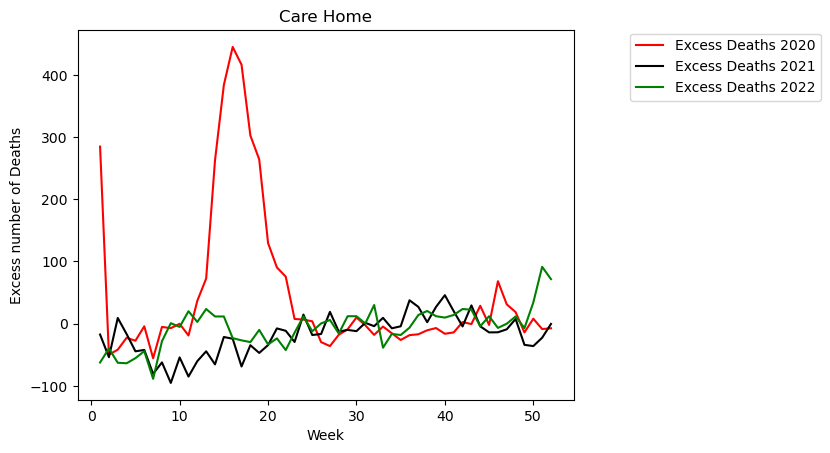

In [61]:
#Excess death for all the three years namely 2020,2021 and 2022 has been plotted below. Color red represnt for year 2020, black
#for 2021 and green for 2022.The (.index) returns the position at the first occurrence of the specified value here for excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(excess_death_2020_care_home.index, excess_death_2020_care_home.values, color='red', label='Excess Deaths 2020')
plt.plot(excess_death_2021_care_home.index, excess_death_2021_care_home.values, color='black', label='Excess Deaths 2021')
plt.plot(excess_deaths_2022_care_home.index, excess_deaths_2022_care_home.values, color='green', label='Excess Deaths 2022')

plt.xlabel('Week')
plt.ylabel('Excess number of Deaths')
plt.title('Care Home')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))


plt.show()

## Line graph of home / non-institution 2020, 2021 and 2022

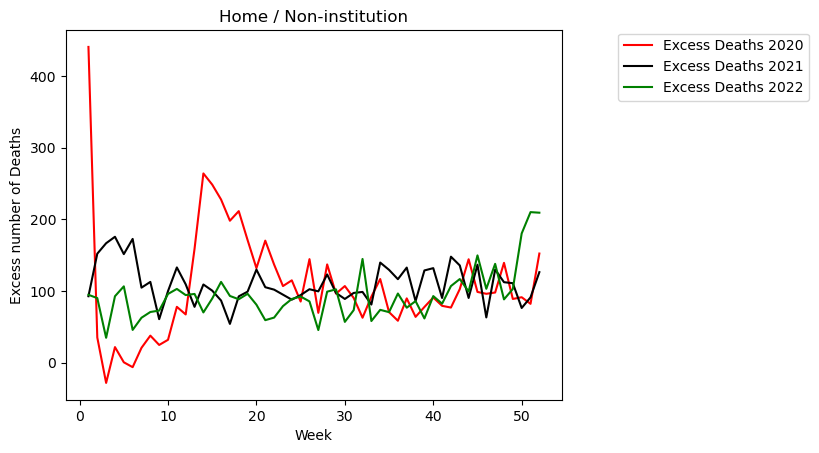

In [62]:
#Excess death for all the three years namely 2020,2021 and 2022 has been plotted below. Color red represnt for year 2020, black
#for 2021 and green for 2022.The (.index) returns the position at the first occurrence of the specified value here for excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(excess_death_2020_home_non_inst.index, excess_death_2020_home_non_inst.values, color='red', label='Excess Deaths 2020')
plt.plot(excess_death_2021_home_non_inst.index, excess_death_2021_home_non_inst.values, color='black', label='Excess Deaths 2021')
plt.plot(excess_death_2022_home_non_inst.index, excess_death_2022_home_non_inst.values, color='green', label='Excess Deaths 2022')

plt.xlabel('Week')
plt.ylabel('Excess number of Deaths')
plt.title('Home / Non-institution')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))


plt.show()

## Line graph of hospital 2020, 2021 and 2022

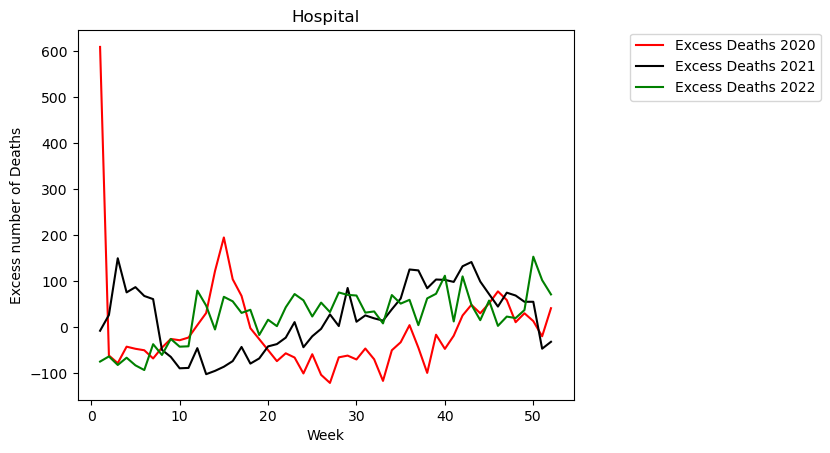

In [63]:
#Excess death for all the three years namely 2020,2021 and 2022 has been plotted below. Color red represnt for year 2020, black
#for 2021 and green for 2022.The (.index) returns the position at the first occurrence of the specified value here for excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(excess_death_2020_hospital.index, excess_death_2020_hospital.values, color='red', label='Excess Deaths 2020')
plt.plot(excess_death_2021_hospital.index, excess_death_2021_hospital.values, color='black', label='Excess Deaths 2021')
plt.plot(excess_death_2022_hospital.index, excess_death_2022_hospital.values, color='green', label='Excess Deaths 2022')

plt.xlabel('Week')
plt.ylabel('Excess number of Deaths')
plt.title('Hospital')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))


plt.show()

## Line graph of other institution 2020, 2021 and 2022

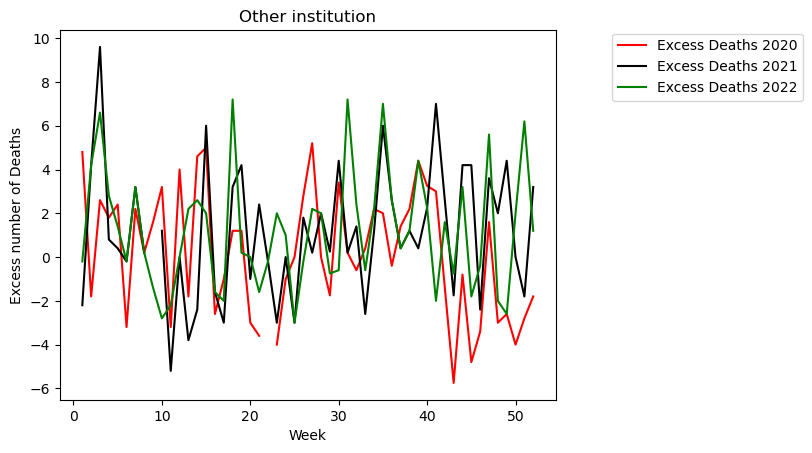

In [64]:
#Excess death for all the three years namely 2020,2021 and 2022 has been plotted below. Color red represnt for year 2020, black
#for 2021 and green for 2022.The (.index) returns the position at the first occurrence of the specified value here for excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(excess_death_2020_other_inst.index, excess_death_2020_other_inst.values, color='red', label='Excess Deaths 2020')
plt.plot(excess_death_2021_other_inst.index, excess_death_2021_other_inst.values, color='black', label='Excess Deaths 2021')
plt.plot(excess_death_2022_other_inst.index, excess_death_2022_other_inst.values, color='green', label='Excess Deaths 2022')

plt.xlabel('Week')
plt.ylabel('Excess number of Deaths')
plt.title('Other institution')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))


plt.show()